In [1]:
# 6. Quiz  

어느 결혼식장에서 피로연의 식수 인원을 올바르게 예측하지 못하여 버려지는 음식으로 고민이 많다고 합니다. 
현재까지 진행된 결혼식에 대한 결혼식 참석 인원과 그 중에서 식사를 하는 인언의 데이터가 제공될 때, 아래 각 문항에 대한 코드를 작성하시오.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1) quizData.csv 파일로부터 데이터를 읽어와서 결혼식 참석 인원(total), 식수 인원(reception)을 각각의 변수로 저장하시오.

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stolio_Movie/ScikitLearn/QuizData.csv')
input_total = dataset.iloc[:,:-1].values
target_reception = dataset.iloc[:,-1].values

2) 전체 데이터를 훈련 세트와 테스트 세트로 분리하시오. 이 때 비율은 75 : 25 으로 합니다.

In [4]:
from sklearn.model_selection import train_test_split
total_train, total_test, reception_train, reception_test= train_test_split(input_total, target_reception, test_size=0.25, random_state=0)

3) 훈련 세트를 이용하여 단순 선형 회귀 (Simple Linear Regression) 모델을 생성하시오.

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(total_train,reception_train)

LinearRegression()

4) 데이터 시각화 (훈련 세트) 코드를 작성하시오.

In [11]:
reception_pred=reg.predict(total_train) # plot의 y값을 위해서 pred값을 생성해 줍니다.

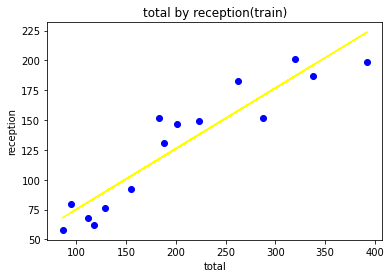

In [25]:
plt.scatter(total_train,reception_train,color='blue') 
plt.plot(total_train,reception_pred,color='yellow') # 단순선형회귀
# 변수생성하지 않고 y부분에 그냥 reg.predict(total_train)을 넣어도 됩니다
plt.title('total by reception(train)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

5) 데이터 시각화 (테스트 세트)코드를 작성하시오.

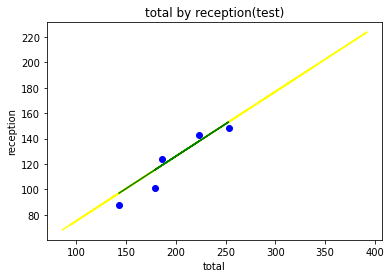

In [26]:
plt.scatter(total_test,reception_test,color='blue') 
plt.plot(total_train,reception_pred,color='yellow') # 모델을 만들 때에는 훈련세트를 사용합니다.
# 같은 reg모델이기 때문에 plot에 test값을 넣어도 똑같습니다
plt.plot(total_test,reg.predict(total_test),color='green')
plt.title('total by reception(test)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

6) 훈련 세트, 테스트 세트에 대해 각각 모델 평가 점수를 구하시오.

In [17]:
print('훈련 세트의 모델 평가 점수 :',reg.score(total_train,reception_train))

훈련 세트의 모델 평가 점수 : 0.8707088403321211


In [18]:
print('테스트 세트의 모델 평가 점수 :',reg.score(total_test,reception_test))

테스트 세트의 모델 평가 점수 : 0.8634953212566615


7) 결혼식 참석 인원이 300명일 때 예상되는 식수 인원을 구하시오.

In [22]:
print('예상 식수 인원 :',reg.predict([[300]]))

예상 식수 인원 : [176.92793218]


In [28]:
# 답처럼 출력하는 방법
total = 300
reception_pred = reg.predict([[total]])
print(f'결혼식 참석 인원 {total}에 대한 예상 식수 인원은 {np.around(reception_pred[0]).astype(int)}명 입니다')
# np.around : 반올림 해주기 ==> 실수형
# .astype(int) : 정수형으로 바꿔주기

결혼식 참석 인원 300에 대한 예상 식수 인원은 177명 입니다
